In [1]:
import pandas as pd

In [3]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
x = data.iloc[:,[3,4]].values
x.shape

(200, 2)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)

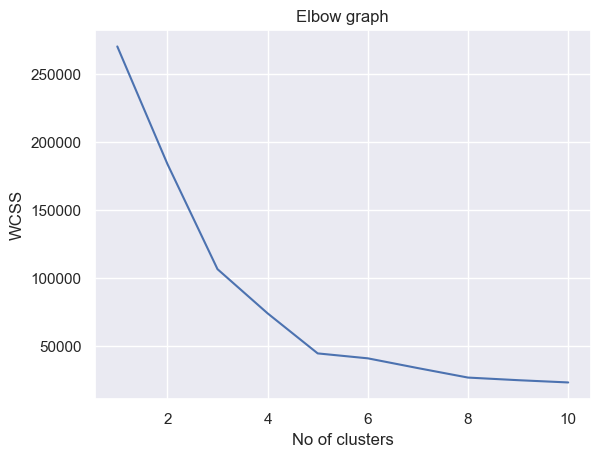

In [21]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow graph')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
km = KMeans(n_clusters= 5, init = 'k-means++', random_state=0)
y = km.fit_predict(x)
y.shape

(200,)

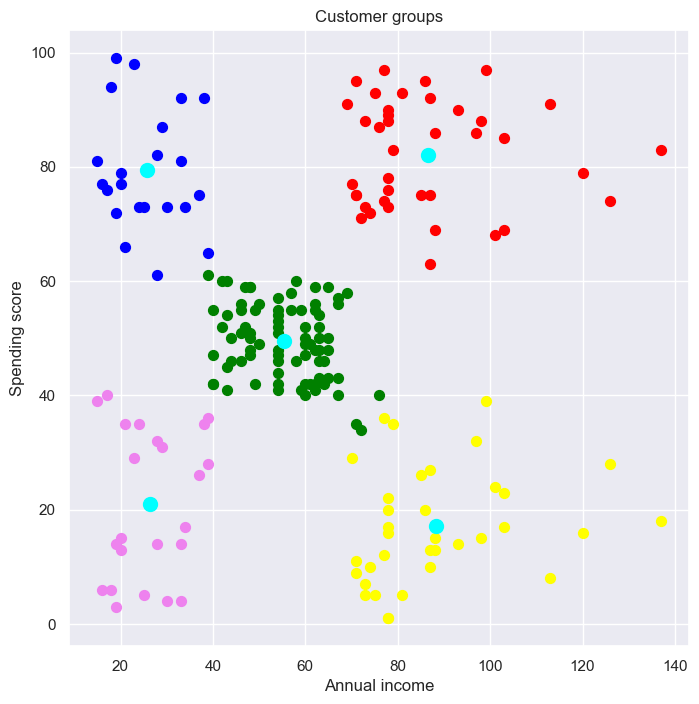

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c= 'green', label="Cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50, c= 'red', label="Cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50, c= 'yellow', label="Cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50, c= 'violet', label="Cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50, c= 'blue', label="Cluster 5")
#plot centroids

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c = "cyan", label = "centroids")

plt.title("Customer groups")
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()